# COURSE: A deep understanding of deep learning
## SECTION: FFNs
### LECTURE: Scrambled MNIST
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# import dataset (comes with colab!)
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# extract labels (number IDs) and remove from data
labels = data[:,0]
data   = data[:,1:]

# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

In [2]:
import torchvision
MNIST = torchvision.datasets.MNIST(".", download=True)
data = MNIST.train_data
labels = MNIST.train_labels

data = data.view(data.shape[0], -1).numpy()
labels = labels.numpy()
indices = np.random.choice(data.shape[0], 20000, replace=False)
data = data[indices]
labels = labels[indices]

dataNorm = data / np.max(data)

c:\Users\pmiha\anaconda3\envs\MLFlow_env\lib\site-packages\torchvision\datasets\mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\Users\pmiha\anaconda3\envs\MLFlow_env\lib\site-packages\torchvision\datasets\mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


# Scramble the images

In [4]:
np.random.permutation(data.shape[1])

array([201, 233, 508, 557, 213, 534, 631, 763, 177,  57, 779, 108, 656,
       698,  15, 490, 172, 766, 135, 565,  37, 174, 211, 488, 244, 253,
       567, 134, 499, 632, 166, 596, 520, 514, 164, 517, 150, 530, 110,
       104,  22, 782, 199, 582, 544, 652, 618, 384, 402, 287, 288, 706,
       540, 665, 346,  60, 196, 189, 373, 621, 733, 668, 694, 298,  85,
       639, 267, 740, 537, 123,  80, 709,  67,  16, 269, 697, 438,  68,
       430, 355, 459,  35, 686,  31, 581, 588, 191,  83, 643, 720,  56,
       153, 216, 311, 327, 771, 512, 274, 292, 649, 118, 115, 250, 328,
       735, 466, 669, 464, 159, 125, 101, 532, 564, 366, 739, 362, 498,
       441, 318, 198, 256, 609, 657, 103,  38, 538,  91, 469, 409, 291,
       114, 187,  43, 360, 403, 151, 132, 352, 149, 646, 423, 442, 145,
       607, 312,  44, 285, 726,  62, 662, 382, 235,  52, 524, 303, 367,
       529, 751, 744, 676, 369, 683, 140, 535, 280, 614, 148, 437, 347,
       157, 769, 240, 580, 667, 700, 266, 593, 764, 158, 533, 44

In [11]:
len(dataNorm)

20000

In [15]:
scrambled = np.zeros(dataNorm.shape)

In [26]:
np.random.permutation(data.shape[1])

array([541, 611, 753, 533, 649, 692, 404, 767, 110, 383, 518, 650, 105,
       247, 342, 153, 181, 783, 401, 554, 584, 572, 645, 744, 588, 388,
       766,  86, 652, 765, 467, 297, 122, 515, 606, 450, 434, 304, 725,
       108, 217, 360,  13,  62, 254,  75, 605, 697,  45, 243, 377, 473,
       417, 138, 463, 602, 185, 527, 261, 228, 751,  65, 771, 513,  35,
       402, 712, 691, 398, 685, 731, 735, 225, 107, 392, 727, 372, 730,
        28, 704, 211, 546, 141, 273, 184, 641, 636, 335, 127, 715, 658,
        34, 344, 152, 720,  46, 305, 239, 635, 168, 474, 337, 380, 310,
       235, 674, 689, 621, 530, 231, 445, 327, 779, 341, 682, 642, 484,
        78,  20, 183, 233, 227, 295, 242, 594, 427,   5, 680, 370, 675,
       338, 365, 134, 452, 657, 742, 681, 469,  82,  79,  89, 483, 502,
       321, 613, 486, 328, 581, 560, 424, 405, 412, 287, 656, 276, 509,
       275, 117, 429, 159, 661, 376, 514, 592,  76, 302, 648, 485, 678,
       708, 291, 196, 561,  15,   6, 223, 290, 770, 543,  63, 78

In [27]:
for i in range(len(dataNorm)):
    eggs = np.random.permutation(data.shape[1])
    scrambled[i] = dataNorm[i,eggs]


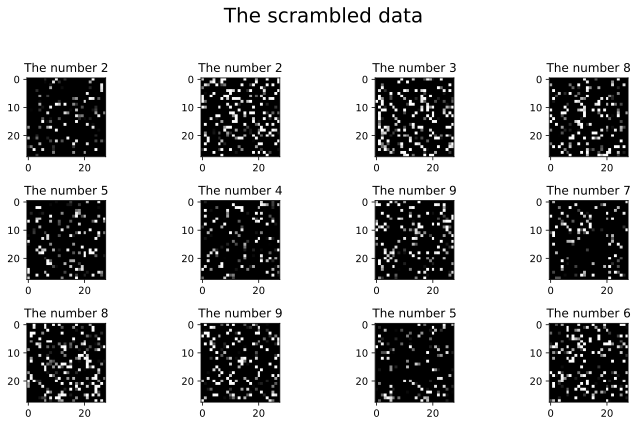

In [28]:
# randomly scramble the data,
# preserving the re-ordering for each image
#eggs = np.random.permutation(data.shape[1])
#scrambled = dataNorm[:,eggs]


# show a few random digits
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten():
  # pick a random image
  randimg2show = np.random.randint(0,high=data.shape[0])

  # create the image (must be reshaped!)
  img = np.reshape(scrambled[randimg2show,:],(28,28))
  ax.imshow(img,cmap='gray')

  # title
  ax.set_title('The number %i'%labels[randimg2show])

plt.suptitle('The scrambled data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

# Create train/test groups using DataLoader

In [29]:
# Step 1: convert to tensor
dataT   = torch.tensor( scrambled ).float()
labelsT = torch.tensor( labels ).long()

# Step 2: use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.1)

# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

# Create the DL model

In [30]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)
      
      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)
      # NOTE: no log-softmax above because of the loss function below
  
  # create the model instance
  net = mnistNet()
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

# Create a function that trains the model

In [31]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 100
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader))
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net


# Run the model and show the results!

In [32]:
trainAcc,testAcc,losses,net = function2trainTheModel()


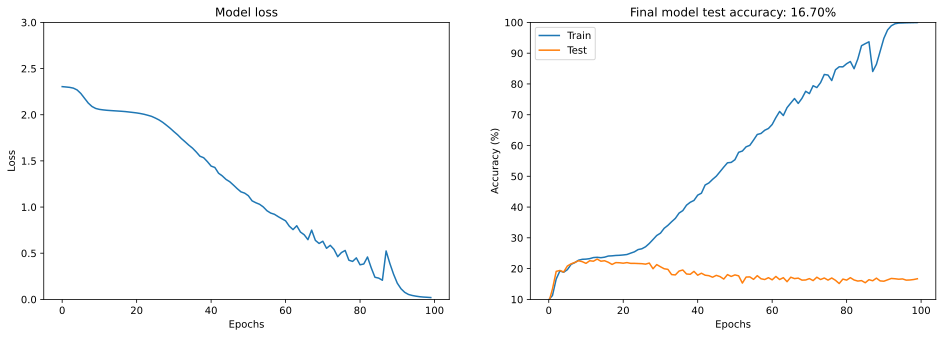

In [33]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

# Optional explorations

In [ ]:
# 1) We scrambled all images using the same permuted index. What would happen if each image is uniquely 
#    randomly scrambled? Rewrite the scrambling code so that each individual stimulus has a unique, 
#    random permuted index. What do the results show and why is that the case?
# 